# How to run the PyRICE model

This notebook provides an example of how to run the PyRICE model and shows the main parameters and their domains.

---

## 1. Imports
First, we need some imports, and we need to set the current working directory straight.

In [1]:
from model.pyrice import PyRICE
from model.enumerations import *

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.8)
sns.set_style("whitegrid")

---
## 2. Initialize the model

The most important parameters are listed below.

### Model Parameters

**Bolded** elements are model default values.

| Variable | Values | Description |
| --------------- | --------------- | ---------------------------- |
| `model_specification` | **`ModelSpec.EMA`** <br> `ModelSpec.Validation_1` <br> `ModelSpec.Validation_2` | Stochastic simulation model <br> Replicating RICE2010 <br> Deterministic RICE2010|
| `damage_function` | **`DamageFunction.NORDHAUS`** <br> `DamageFunction.NEWBOLD` <br> `DamageFunction.WEITZMAN` | Nordhaus + SLR <br> Newbold & Daigneault <br> Weitzman |
| `welfare_function` | **`WelfareFunction.UTILITARIAN`** <br> `WelfareFunction.EGALITARIAN` <br> `WelfareFunction.SUFFICIENTARIAN` <br> `WelfareFunction.PRIORITARIAN`| Total aggregated utility <br> Equal distribution of risks & benefits <br> People above some threshold  <br> Wellbeing of worst-off region|


In [2]:
model_specification = ModelSpec.STANDARD
damage_function = DamageFunction.NORDHAUS
welfare_function = WelfareFunction.UTILITARIAN

model = PyRICE(model_specification=model_specification,
               damage_function=damage_function,
               welfare_function=welfare_function)

---
## 3. Run the model
Next, we can run the model with specific lever values. The most important parameters are listed below.

### Levers

| Variable        | Values          | Default       | Description |
| --------------- | --------------- | ----------    | ----------- |
| `sr`            | `[0.1, 0.5]`    | `0.248`       | Savings rate |
| `miu`           | `[2005, 2305]`  | `2135`        | Emission control rate target (year of zero-emission)|
| `irstp_consumption`         | `[0.001, 0.015]`| `0.015`       | Initial rate of social time preference |

### Miscellaneous Parameters

| Variable        | Values          | Default       | Description |
| --------------- | --------------- | ----------    | ----------- |
| `precision`     | `{10, 20, 30}` | `10`           | Precision of timeseries data of final outcomes in years |

Let's take the **original policy by Nordhaus** (which is also the default policy):

In [3]:
sr = 0.248
miu = 2135
irstp_consumption = 0.015
ini_suf_threshold_damage = 0.9

results = model(sr=sr, miu=miu, irstp_consumption=irstp_consumption, ini_suf_threshold_damage=ini_suf_threshold_damage)
# for k, v in results.items():
#     print(f'{k}:\t{v}')

---
## 4. View Results
Running the model will return a dictionary containing all outcome variables. This dictionary is handy for conducting further optimization. It is, however, not handy, to inspect the results.

An alternative data structure for this is in form of a `Results` object which is also saved within the model and contains the same information as the dictionary.

First, let's get the results in better formatting.

In [4]:
results_formatted = model.get_better_formatted_results()

## Highly Aggregated variables

In [5]:
print(f'aggregated_utility_gini: \t{results_formatted.aggregated_consumption_gini}')
print(f'aggregated_impact_gini: \t{results_formatted.aggregated_damage_gini}')
print(f'aggregated_utility: \t\t{results_formatted.aggregated_utility}')
print(f'aggregated_disutility: \t\t{results_formatted.aggregated_disutility}')
print(f'aggregated_costs: \t\t{results_formatted.aggregated_costs}')


aggregated_utility_gini: 	0.3690327913633553
aggregated_impact_gini: 	0.491654347271235
aggregated_utility: 		2255.0112446066987
aggregated_disutility: 		16893.80455832939
aggregated_costs: 		1048.3818173963546


## Dataframe on spatially aggregated variables of interest

In [6]:
results_formatted.df_main.head()

,Damages,Utility,Disutility,Lowest income per capita,Highest climate impact per capita,Distance to consumption threshold,Population below consumption threshold,Distance to damage threshold,Population below damage threshold,Intratemporal consumption GINI,Intratemporal damage GINI,Atmospheric temperature,Industrial emission,Total output,Regions below consumption threshold,Regions below damage threshold,Costs
2005,0.087272,-1070.654524,4.640735e-14,0.389919,0.000980,0.141524,524.319045,0.229768,1125.359380,0.505547,0.585386,0.830000,9.567636,55.291673,"[India, Africa, Africa]","[China, India, Africa, Other non-OECD Asia, Af...",0.087272
2015,0.245626,667.743977,3.563849e-06,0.691963,0.008097,0.356425,189.258700,0.121205,845.308685,0.433054,0.568593,0.980000,9.726659,81.009176,[Africa],"[India, Africa, Other non-OECD Asia, Africa]",0.266213
2025,0.487449,1492.441361,1.012885e-01,0.877597,0.011462,0.323883,227.539761,0.770620,227.539761,0.419838,0.562394,1.196959,10.166511,111.752715,[Africa],[Africa],0.549978
2035,0.905594,2216.694928,2.614679e-01,1.243212,0.015049,0.116144,265.114464,0.908694,265.114464,0.405447,0.558169,1.436645,10.368132,148.171906,[Africa],[Africa],1.048889
2045,1.554466,2721.480345,6.035987e-01,1.704938,0.019170,0.000000,0.000000,0.861833,300.634834,0.391946,0.558917,1.681077,10.309960,189.604644,[],[Africa],1.830079


## Dataframe on spatially and temporally disaggregated population

In [7]:
results_formatted.df_population.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,296.842578,490.080193,127.773000,143.150000,155.942468,1304.500000,1094.583000,412.769001,763.506112,555.380079,129.169624,937.195567
2015,325.864356,511.847206,126.110786,137.963728,157.730876,1387.750163,1252.943464,499.316474,946.293499,617.246624,138.914928,1081.012964
2025,351.756112,524.060185,121.100084,132.326519,159.228609,1444.554518,1385.654351,582.455128,1137.698804,668.207819,146.531473,1214.655542
2035,372.610827,529.149615,114.022140,125.369495,157.787111,1453.711091,1479.182218,655.972586,1325.572319,704.769042,151.223203,1328.204071
2045,389.051763,529.144110,106.008825,119.081377,154.937380,1431.779453,1543.052473,718.790224,1503.174171,724.343533,152.626045,1416.592288


## Dataframe on spatially disaggregated CPC

In [8]:
results_formatted.df_cpc.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,34.276554,21.921925,25.678621,9.586258,4.163815,2.624481,1.564919,6.243077,1.190955,6.264255,24.158743,2.115834
2015,38.936854,25.548341,28.713761,14.496564,12.679826,6.617180,2.668637,8.618536,2.113509,8.769720,29.130547,2.777955
2025,46.271728,31.352820,34.746644,16.646885,12.560557,8.927207,3.894266,11.211704,2.680503,11.748471,35.267724,4.120208
2035,54.325731,37.918028,41.827055,20.742332,12.675307,11.763691,5.459634,14.194919,3.797226,15.298614,42.170385,5.835436
2045,62.652572,44.888362,49.329607,25.160749,12.974942,15.073098,7.405389,17.563930,5.207507,19.442211,49.538420,8.002711


## Dataframe on CPC pre damage
Cell entries represent quintiles.

In [9]:
results_formatted.df_cpc_pre_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.9224726710998, 17.673359329293834, 26.25265...","[7.992526419783532, 13.638652501271912, 18.391...","[9.899247036554964, 16.45589117764981, 21.3412...","[3.406456492836089, 5.373565171797775, 7.29269...","[1.7697210949898872, 2.705072226116459, 3.5181...","[0.854970913526864, 1.4074136576519145, 2.0124...","[0.638109144538283, 0.92171320877752, 1.197439...","[2.1733546279734735, 3.555323333332738, 4.9085...","[0.39224888751856923, 0.6369693071736533, 0.88...","[1.3478796842514897, 2.711059885609995, 4.1613...","[8.776638808896472, 15.281424899716676, 20.609...","[0.7984760012858524, 1.211401132939834, 1.6400..."
2015,"[10.140987438402323, 20.086955887604603, 29.83...","[9.332956105510688, 15.92599616782146, 21.4754...","[11.077547243334688, 18.41462398892, 23.881465...","[5.152676325822566, 8.128165471720106, 11.0310...","[5.386984868790558, 8.234169323250466, 10.7090...","[2.164092122296639, 3.5624285705498515, 5.0939...","[1.089611814377152, 1.5738837318781085, 2.0447...","[3.004983129878101, 4.91575856991584, 6.786743...","[0.6971481372718336, 1.1320923529054514, 1.573...","[1.8881338374288674, 3.7977009113828166, 5.829...","[10.608775824529852, 18.471446139056344, 24.91...","[1.049674615744739, 1.592504992865954, 2.15601..."
2025,"[12.061819930164738, 23.891681784749384, 35.48...","[11.468764029876265, 19.570593703061622, 26.39...","[13.41857717641339, 22.306206215336545, 28.928...","[5.921848573733898, 9.341507609270376, 12.6777...","[5.340378200289258, 8.162929620637664, 10.6163...","[2.9275112657425018, 4.819133929760733, 6.8909...","[1.5938031778903832, 2.3021601458416647, 2.990...","[3.9168216656775936, 6.407406909691277, 8.8461...","[0.8877721021824835, 1.4416448302316829, 2.003...","[2.5320423508968224, 5.092827294888739, 7.8171...","[12.863075746759288, 22.396515372629793, 30.20...","[1.55943597186949, 2.3658851362190627, 3.20305..."
2035,"[14.177773696362836, 28.082897898564852, 41.71...","[13.89678733651112, 23.71383507692984, 31.9769...","[16.174948021368724, 26.888225282275283, 34.87...","[7.385600669583527, 11.65052499990641, 15.8114...","[5.396432780361215, 8.24861074187679, 10.72780...","[3.8707328562263132, 6.371821778711008, 9.1111...","[2.24092494130315, 3.236891581882328, 4.205192...","[4.971336386594224, 8.132454789297384, 11.2277...","[1.2622068511336477, 2.049685924063652, 2.8483...","[3.301535772938589, 6.640549078303466, 10.1928...","[15.413615314393866, 26.837381597756387, 36.19...","[2.213345262832771, 3.3579581035181962, 4.5461..."
2045,"[16.37410662711248, 32.43332658831895, 48.1776...","[16.489363276887577, 28.13787329423615, 37.942...","[19.10799198881071, 31.763934734646373, 41.193...","[8.969013150303644, 14.148302434281808, 19.201...","[5.5355979244874405, 8.461328874290476, 11.004...","[4.979626079104554, 8.197230622525955, 11.7212...","[3.0493756019187748, 4.404653647216008, 5.7222...","[6.16870947984703, 10.091200243147199, 13.9320...","[1.7382607219113726, 2.82274536131258, 3.92257...","[4.202326051021726, 8.45235499599175, 12.97382...","[18.153476443342022, 31.60788463306799, 42.627...","[3.04293768462177, 4.616567251463918, 6.250142..."


## Dataframe on CPC post damage
Cell entries represent quintiles.

In [10]:
results_formatted.df_cpc_post_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.91190408878549, 17.652425406632798, 26.2215...","[7.981923424116799, 13.620559276955115, 18.366...","[9.88625597833333, 16.434295652294363, 21.3132...","[3.4031215055215807, 5.3683043467382685, 7.285...","[1.7677483786463275, 2.702056869512485, 3.5141...","[0.8529563537731559, 1.4040973823650411, 2.007...","[0.6337878019387009, 0.9154712694670125, 1.189...","[2.1634543035383547, 3.5391277000850874, 4.886...","[0.38991853536284493, 0.6331850700595785, 0.87...","[1.3453601935781796, 2.7059923041512146, 4.153...","[8.765022298834033, 15.261198839378403, 20.581...","[0.7956960939410769, 1.2071836199507076, 1.634..."
2015,"[10.123582167095572, 20.052480061746998, 29.78...","[9.302321606323403, 15.873720671060926, 21.404...","[11.054775271410342, 18.376769282344462, 23.83...","[5.146280186838308, 8.118075787688602, 11.0173...","[5.383221015085465, 8.228416159009143, 10.7015...","[2.150583407359486, 3.5401911474994607, 5.0621...","[1.0807892195427515, 1.5611399837839743, 2.028...","[2.9866374066661723, 4.8857473711161985, 6.745...","[0.691962790064806, 1.12367191597621, 1.561490...","[1.8834540603883179, 3.7882882346012994, 5.814...","[10.568834770317002, 18.401902862449074, 24.81...","[1.0446978845004489, 1.5849545870203665, 2.145..."
2025,"[12.030649386442837, 23.829940130838697, 35.39...","[11.415767112336628, 19.480158400880757, 26.26...","[13.377416840473282, 22.237783838708832, 28.83...","[5.90964400385569, 9.322255330025879, 12.65163...","[5.332587722421298, 8.151021639561744, 10.6008...","[2.9013421351801387, 4.776055514834997, 6.8293...","[1.5771609084576617, 2.2781213122166224, 2.959...","[3.885264340279694, 6.355783261216871, 8.77485...","[0.8775967463037841, 1.4251211647974662, 1.980...","[2.5231959724858766, 5.075034118002806, 7.7898...","[12.795455901836453, 22.27877923190228, 30.045...","[1.5494746458942423, 2.3507723945053915, 3.182..."
2035,"[14.124689958092716, 27.97775126314519, 41.559...","[13.806195182552251, 23.55924629707565, 31.768...","[16.103344530694063, 26.76919610297195, 34.716...","[7.363527899275021, 11.615705981954966, 15.764...","[5.381308707626824, 8.225493139213079, 10.6977...","[3.82319952486655, 6.293574602472629, 8.999223...","[2.211122071719539, 3.193842992483779, 4.14926...","[4.919056265924145, 8.046931363669833, 11.1096...","[1.2432117645902536, 2.018839980326778, 2.8054...","[3.2856563172182858, 6.608609910504122, 10.143...","[15.299797878080147, 26.63920862480194, 35.926...","[2.1945148981675877, 3.329389774536062, 4.5074..."
2045,"[16.28966861191727, 32.266074365913056, 47.929...","[16.34412846940839, 27.890040886026053, 37.608...","[18.99178260780159, 31.57075550387796, 40.9433...","[8.932065733962713, 14.090019185969354, 19.122...","[5.508525281517396, 8.419947520588382, 10.9506...","[4.898756773793138, 8.064107304551777, 11.5309...","[2.999132203682868, 4.332079849764142, 5.62800...","[6.086540340072443, 9.956782299494408, 13.7464...","[1.704938295649085, 2.7686333843381914, 3.8473...","[4.175573896009724, 8.39854700767198, 12.89123...","[17.972977803581877, 31.293609832879138, 42.20...","[3.0095544377196406, 4.565920139899732, 6.1815..."


---
## 5. More Results

More internal variables can also be accessed via the model attributes. For this purpose, go to the `Submodels` folder in this repository and have a look at the individual submodels and their attributes.

## Visualizations

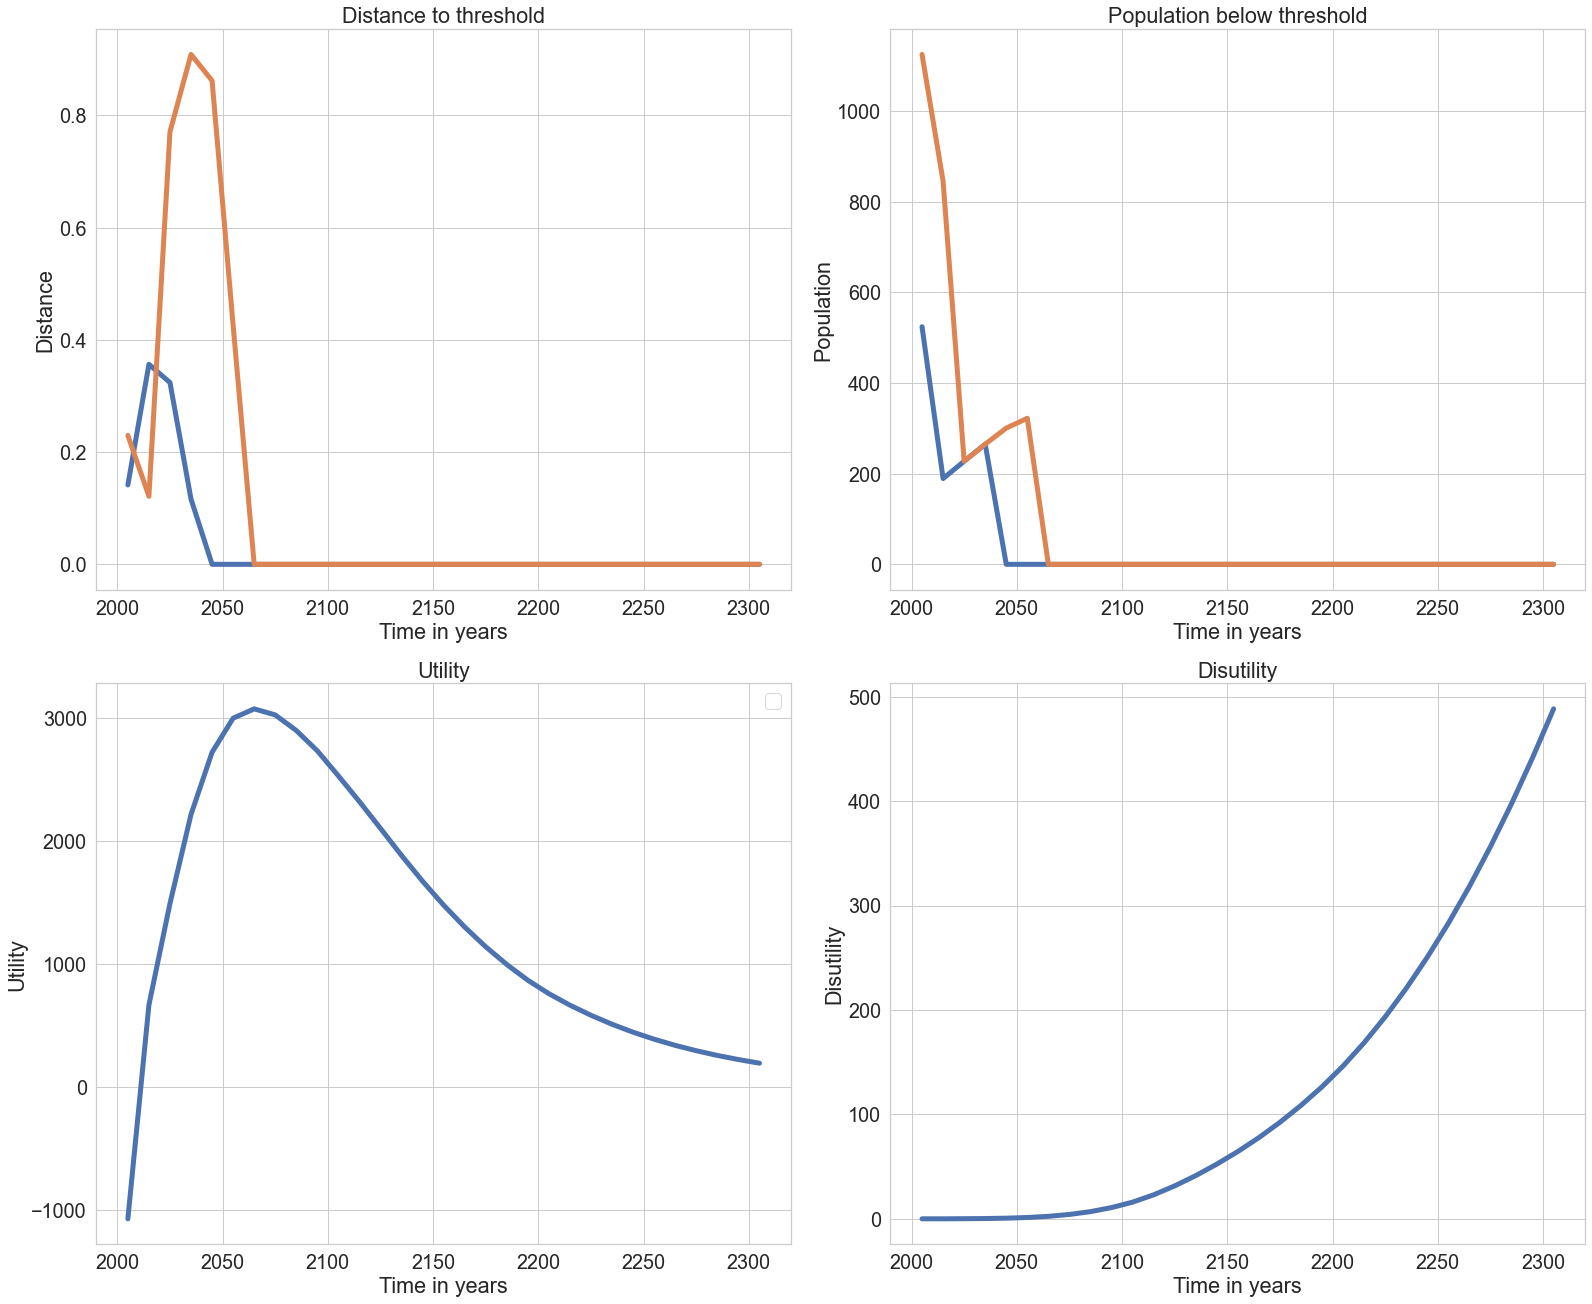

In [11]:
mosaic = """
    AB
    CD
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(22, 18))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to consumption threshold'], label='consumption', linewidth=line_with)
ax_dict["A"].set_title('Distance to consumption threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Distance')

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to damage threshold'], label='damage', linewidth=line_with)
ax_dict["A"].set_title('Distance to threshold')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Distance')

ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population below consumption threshold'], label='consumption', linewidth=line_with)
ax_dict["B"].set_title('Population below consumption threshold')
ax_dict["B"].set_xlabel('Time in years')
ax_dict["B"].set_ylabel('Population')

ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population below damage threshold'], label='damage', linewidth=line_with)
ax_dict["B"].set_title('Population below threshold')
ax_dict["B"].set_xlabel('Time in years')
ax_dict["B"].set_ylabel('Population')

ax_dict["C"].plot(results_formatted.df_main.loc[:, 'Utility'], linewidth=line_with)
ax_dict["C"].set_title('Utility')
ax_dict["C"].set_xlabel('Time in years')
ax_dict["C"].set_ylabel('Utility')

ax_dict["D"].plot(results_formatted.df_main.loc[:, 'Disutility'], linewidth=line_with)
ax_dict["D"].set_title('Disutility')
ax_dict["D"].set_xlabel('Time in years')
ax_dict["D"].set_ylabel('Disutility')

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

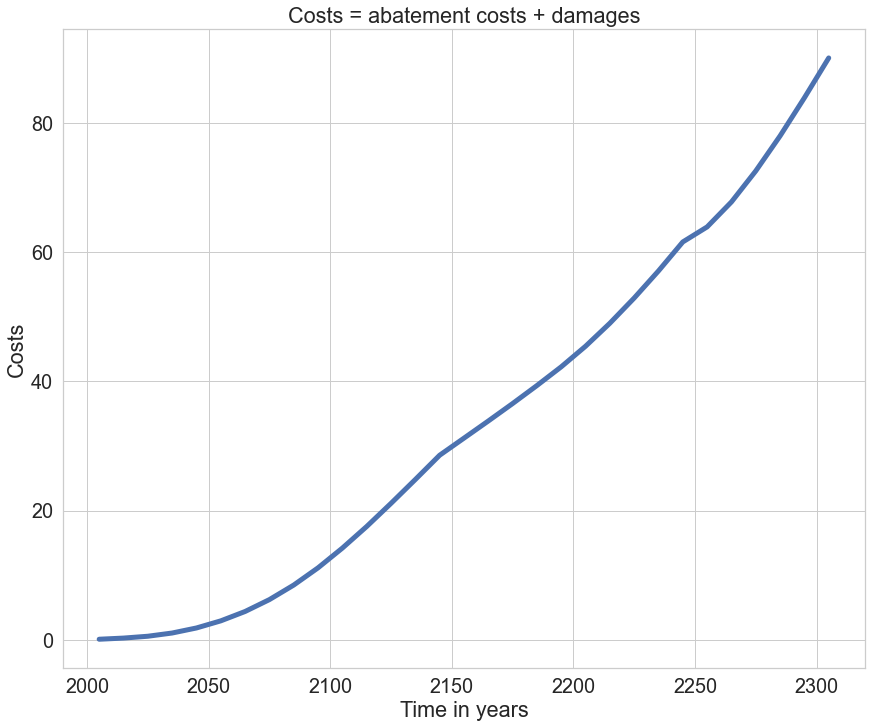

In [12]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Costs'], linewidth=line_with)
ax_dict["A"].set_title('Costs = abatement costs + damages')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Costs')

plt.show()

In [14]:
results_formatted.df_main.loc[:, 'Regions below damage threshold']

2005    [China, India, Africa, Other non-OECD Asia, Af...
2015         [India, Africa, Other non-OECD Asia, Africa]
2025                                             [Africa]
2035                                             [Africa]
2045                                             [Africa]
2055                                             [Africa]
2065                                                   []
2075                                                   []
2085                                                   []
2095                                                   []
2105                                                   []
2115                                                   []
2125                                                   []
2135                                                   []
2145                                                   []
2155                                                   []
2165                                                   []
2175          

In [16]:
results_formatted.df_main.loc[2005, 'Regions below damage threshold']

['China', 'India', 'Africa', 'Other non-OECD Asia', 'Africa', 'Africa']